# Import

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Loading Data


In [8]:
file = "D:\DC2_Output\PAS_T&Cdashboard_to Q3 23-24.xlsx" # insert the path to the original, publicly available PAS
pas_data = pd.read_excel(file)

df_MPS = pd.read_excel(file, sheet_name="MPS")
df_Borough = pd.read_excel(file, sheet_name="Borough")

# Start EDA on MPS data

In [9]:
#Checking for null values 
df_MPS.isnull().sum()
#There are no null values 

Date          0
Survey        0
Borough       0
Measure       0
Proportion    0
dtype: int64

In [10]:
df_MPS.head(10)

,Date,Survey,Borough,Measure,Proportion
0,2014-12-31,PAS,MPS,"""Good Job"" local",0.67
1,2014-12-31,PAS,MPS,Contact ward officer,0.41
2,2014-12-31,PAS,MPS,Informed local,0.49
3,2014-12-31,PAS,MPS,Listen to concerns,0.74
4,2014-12-31,PAS,MPS,Relied on to be there,0.77
5,2014-12-31,PAS,MPS,Treat everyone fairly,0.74
6,2014-12-31,PAS,MPS,Understand issues,0.72
7,2015-03-31,PAS,MPS,"""Good Job"" local",0.67
8,2015-03-31,PAS,MPS,Contact ward officer,0.42
9,2015-03-31,PAS,MPS,Informed local,0.47


In [11]:
df_MPS.describe()

,Date,Proportion
count,291,291.000000
mean,2019-07-26 01:14:13.608247296,0.596426
min,2014-12-31 00:00:00,0.120000
25%,2017-03-31 00:00:00,0.470000
50%,2019-06-30 00:00:00,0.660000
75%,2021-09-30 00:00:00,0.740000
max,2023-12-31 00:00:00,0.880000
std,NaN,0.189186


In [12]:
#Defining all measures used 
unique_measures = df_MPS['Measure'].unique()
unique_measures_list = list(unique_measures)
print(unique_measures_list)

['"Good Job" local', 'Contact ward officer', 'Informed local', 'Listen to concerns', 'Relied on to be there', 'Treat everyone fairly', 'Understand issues', 'Trust MPS']


In [13]:
#Making dictionary for all measures
measures_dict = {}
for measure in unique_measures:
    subset = df_MPS[df_MPS['Measure'] == measure]
    date_proportion_dict = dict(zip(subset['Date'], subset['Proportion']))
    measures_dict[measure] = date_proportion_dict

In [14]:
#Creating dataframe for all measures 
data_list = []
for measure, proportions in measures_dict.items():
    for date, proportion in proportions.items():
        data_list.append((measure, date, proportion))
columns = ['Measure', 'Date', 'Proportion']
df_measures = pd.DataFrame(data_list, columns=columns)
df_measures.head()

,Measure,Date,Proportion
0,"""Good Job"" local",2014-12-31,0.67
1,"""Good Job"" local",2015-03-31,0.67
2,"""Good Job"" local",2015-06-30,0.66
3,"""Good Job"" local",2015-09-30,0.67
4,"""Good Job"" local",2015-12-31,0.67


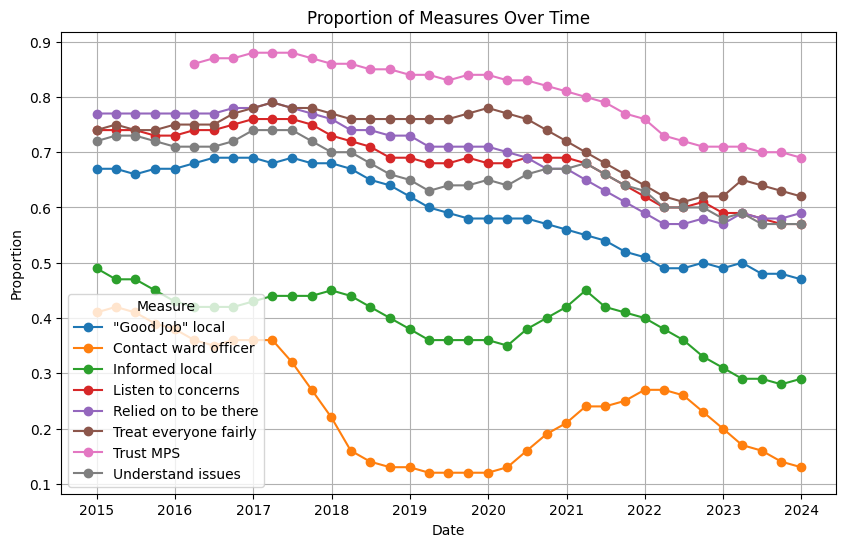

In [15]:
df_measures['Date'] = pd.to_datetime(df_measures['Date'])  # Convert Date to datetime
df_measures.sort_values('Date', inplace=True)  # Sort by date for plotting
plt.figure(figsize=(10, 6))
for label, grp in df_measures.groupby('Measure'):
    plt.plot(grp['Date'], grp['Proportion'], marker='o', linestyle='-', label=label)
plt.title('Proportion of Measures Over Time')
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.legend(title='Measure')
plt.grid(True)
plt.show()

From this we can see that 'Contact ward officer' and 'informed local' are the lowest scoring measures, for all of London. However, where all measures seem to decrease around 2021, 'Contact ward officer', 'Informed local' and 'Understand issues', seem to have a small increase. So maybe an idea to see what happened around the year 2021. 

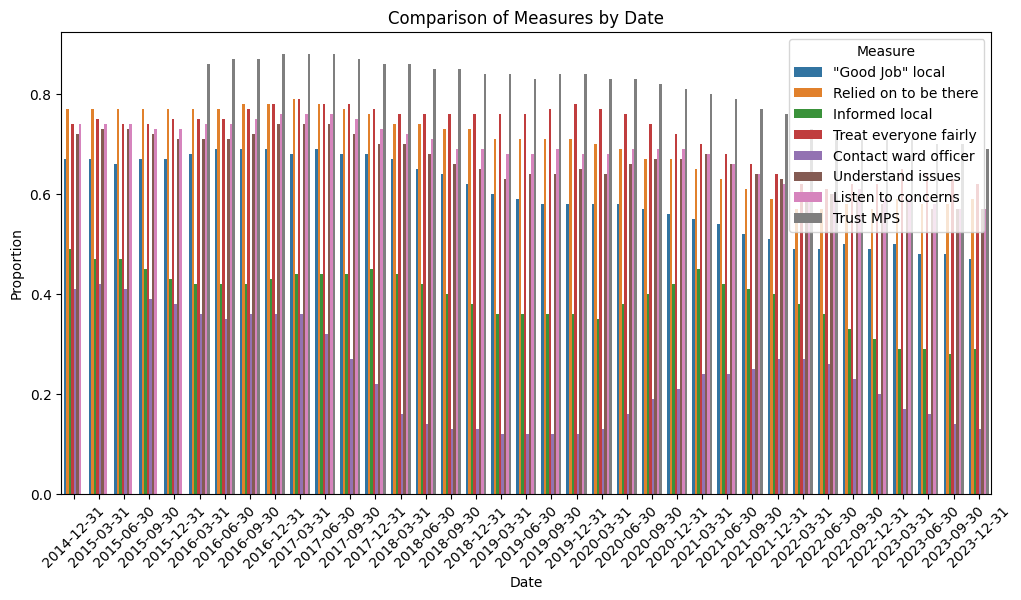

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_measures, x='Date', y='Proportion', hue='Measure')
plt.title('Comparison of Measures by Date')
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.legend(title='Measure')
plt.xticks(rotation=45)  
plt.show()

## Let's get the average proportion per measure 

In [17]:
average_proportions = df_measures.groupby('Measure')['Proportion'].mean()
average_proportions_df = average_proportions.reset_index()
average_proportions_df.columns = ['Measure', 'Average Proportion']
average_proportions_df

,Measure,Average Proportion
0,"""Good Job"" local",0.596216
1,Contact ward officer,0.240541
2,Informed local,0.394865
3,Listen to concerns,0.682973
4,Relied on to be there,0.693784
5,Treat everyone fairly,0.721081
6,Trust MPS,0.806250
7,Understand issues,0.664054


C:\Users\User\AppData\Local\Temp\ipykernel_8220\2981165475.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Measure', y='Average Proportion', data=average_proportions_df, palette='coolwarm')


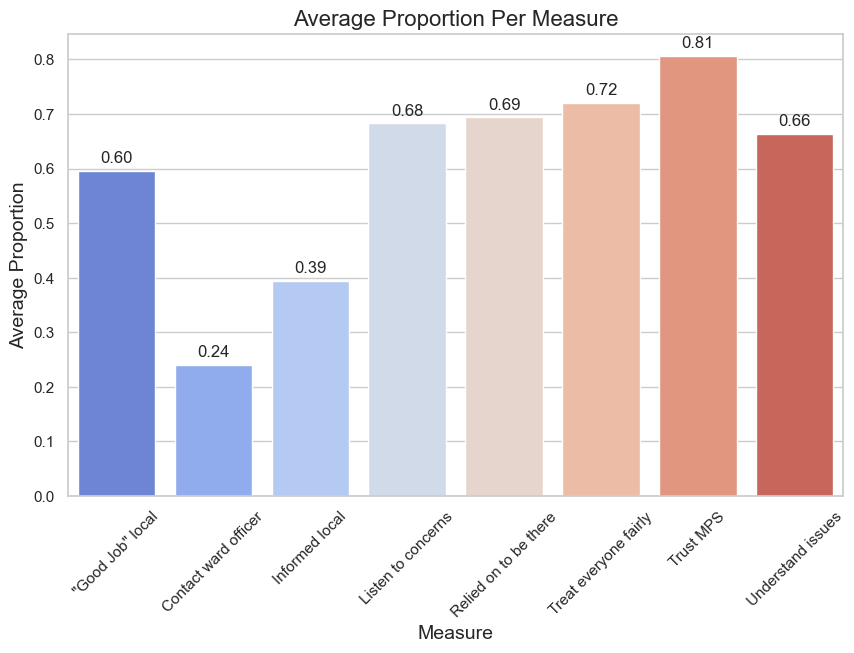

In [18]:
# Setting the style
sns.set(style="whitegrid")

# Creating the bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Measure', y='Average Proportion', data=average_proportions_df, palette='coolwarm')

# Adding title and labels
plt.title('Average Proportion Per Measure', fontsize=16)
plt.xlabel('Measure', fontsize=14)
plt.ylabel('Average Proportion', fontsize=14)
plt.xticks(rotation=45)  

# Adding value labels on top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.2f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 9), 
                      textcoords = 'offset points')

# Show the plot
plt.show()

# Stard EDA for Borough data 

In [19]:
#Checking for null values 
df_Borough.isnull().sum()
#There are null values in the unnamed columns, these columns can be dropped as they do not have any meaning  

Date             0
Survey           0
Borough          0
Measure          0
Proportion       0
MPS              0
Unnamed: 6    9312
Unnamed: 7    9312
Unnamed: 8    9311
Unnamed: 9    9311
dtype: int64

In [20]:
df_Borough.drop(columns = ['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9'], inplace = True)
df_Borough.head()

,Date,Survey,Borough,Measure,Proportion,MPS
0,2014-12-31,PAS,Barking and Dagenham,"""Good Job"" local",0.56,0.67
1,2014-12-31,PAS,Barnet,"""Good Job"" local",0.67,0.67
2,2014-12-31,PAS,Bexley,"""Good Job"" local",0.72,0.67
3,2014-12-31,PAS,Brent,"""Good Job"" local",0.66,0.67
4,2014-12-31,PAS,Bromley,"""Good Job"" local",0.71,0.67


In [21]:
#Defining all Boroughs used 
Boroughs = df_Borough['Borough'].unique()
Boroughs = list(Boroughs)

In [22]:
df_Borough_sorted = df_Borough.sort_values(by=['Borough', 'Measure'])

In [23]:

# Calculate the average proportion for each measure in each borough
average_proportions = df_Borough_sorted.groupby(['Borough', 'Measure'])['Proportion'].mean()

# Reset the index if you want 'Borough' and 'Measure' as regular columns
average_proportions_per_measure_boroughs = average_proportions.reset_index()

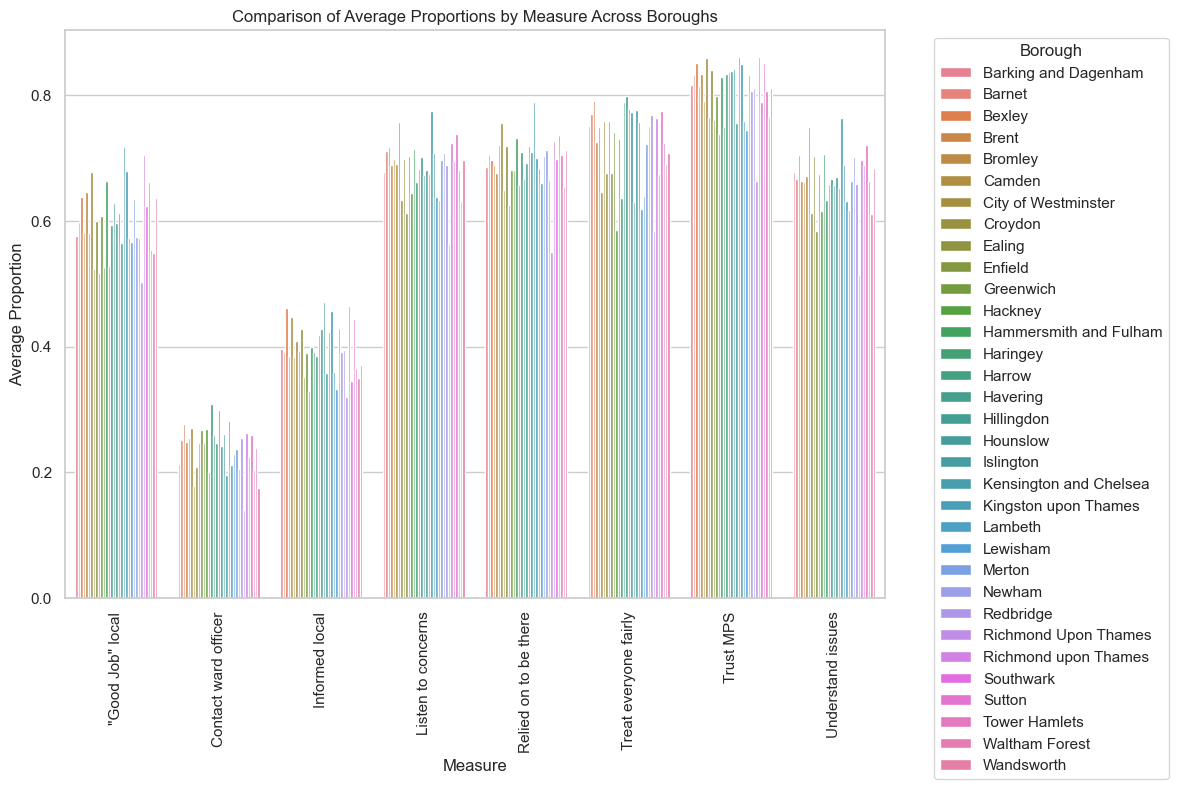

In [24]:
plt.figure(figsize=(12, 8))  
chart = sns.barplot(data=average_proportions_per_measure_boroughs, x='Measure', y='Proportion', hue='Borough')
plt.xticks(rotation=90)  
plt.title('Comparison of Average Proportions by Measure Across Boroughs')
plt.ylabel('Average Proportion')
plt.xlabel('Measure')
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')  
plt.tight_layout()  
plt.show()

# Comparing the measures in the boroughs

In [25]:
print(Boroughs)

['Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Hackney', 'Hammersmith and Fulham', 'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington', 'Kensington and Chelsea', 'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'City of Westminster', 'Richmond Upon Thames']


In [26]:
borough_dfs = {}  # Dictionary to hold each borough's DataFrame

for borough in Boroughs:
    borough_dfs[borough] = df_Borough[df_Borough['Borough'] == borough]

# Now 'borough_dfs' contains a DataFrame for each borough, accessible by borough name


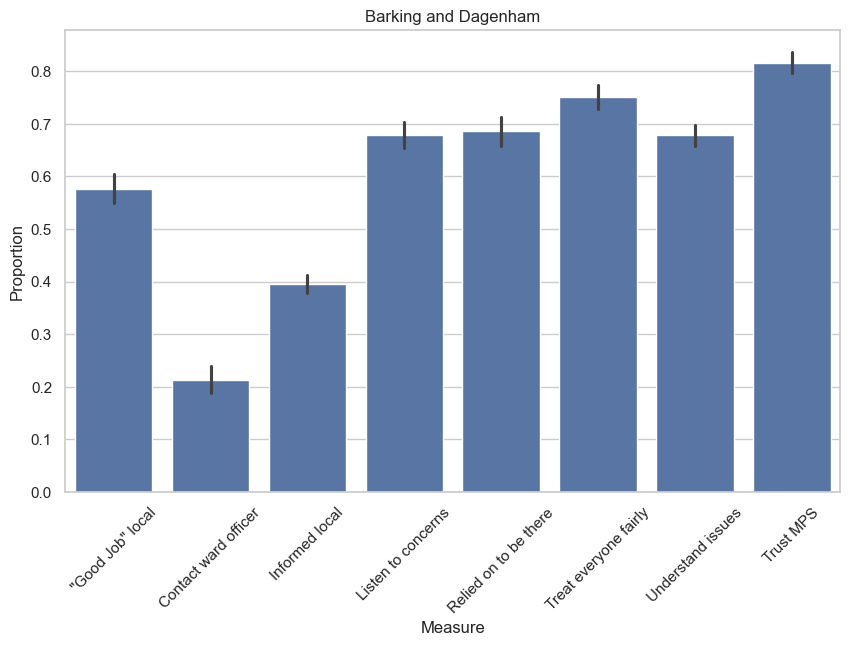

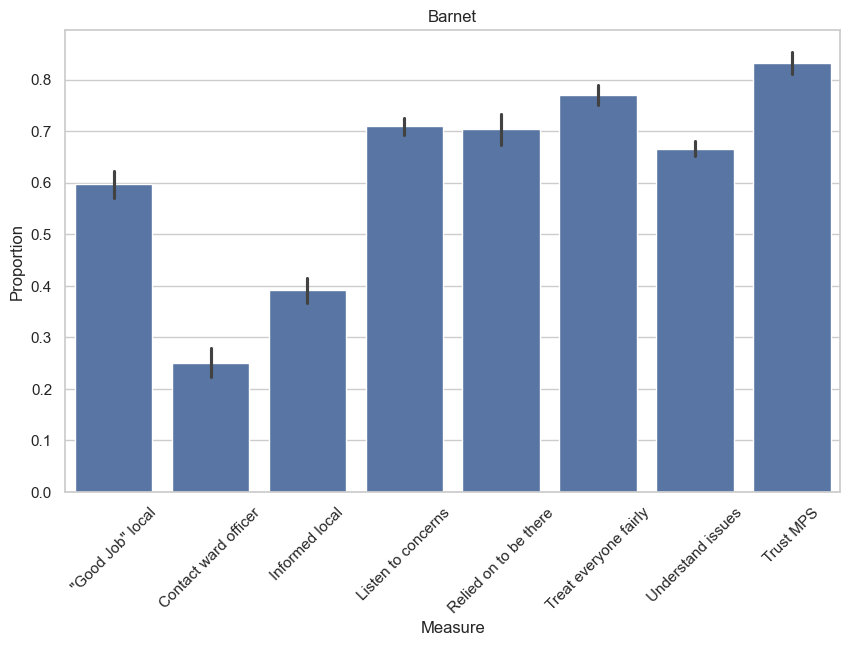

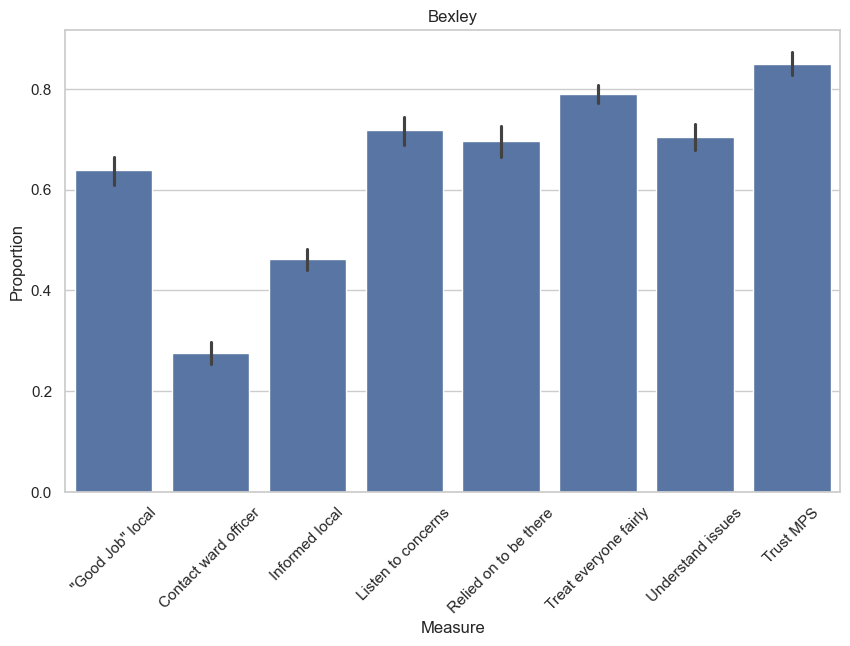

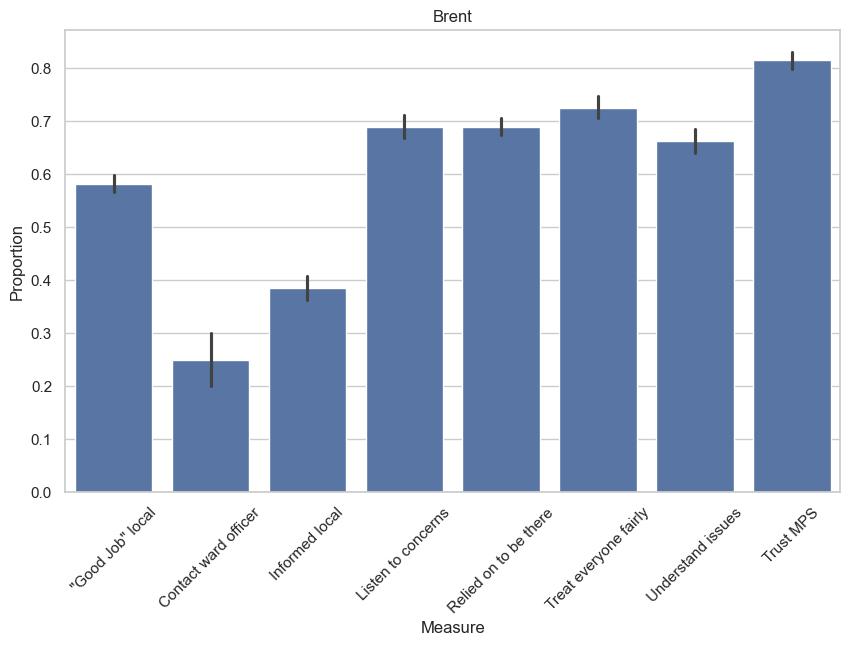

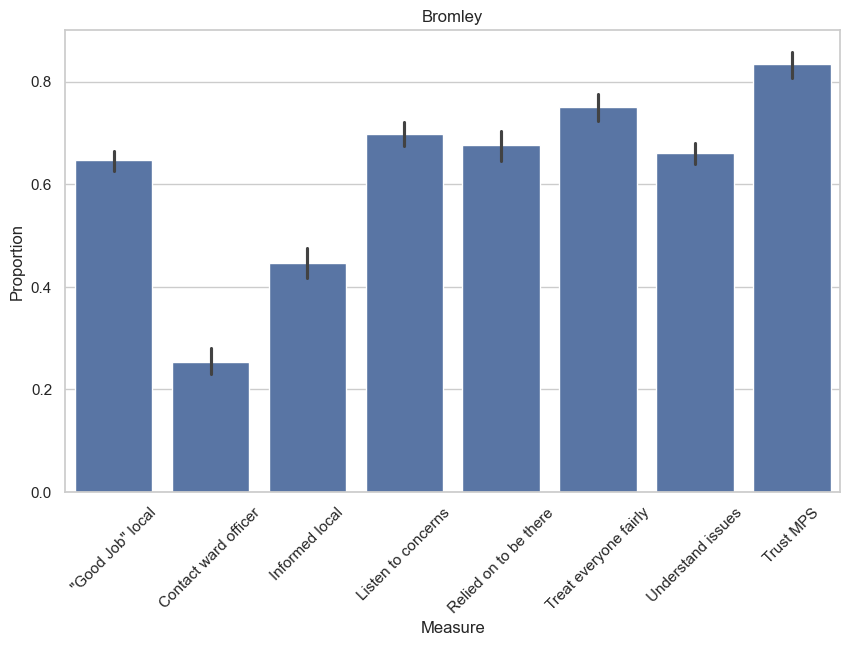

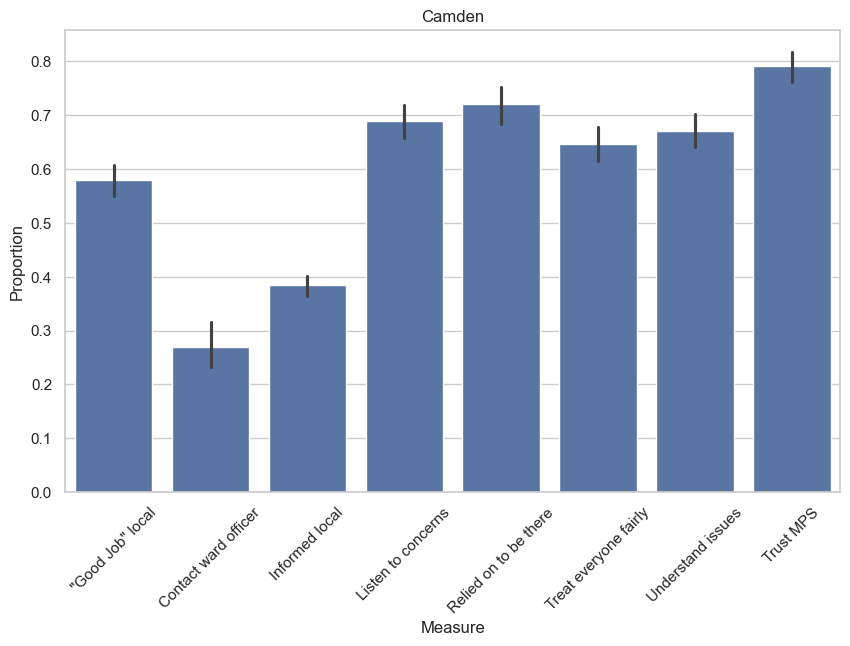

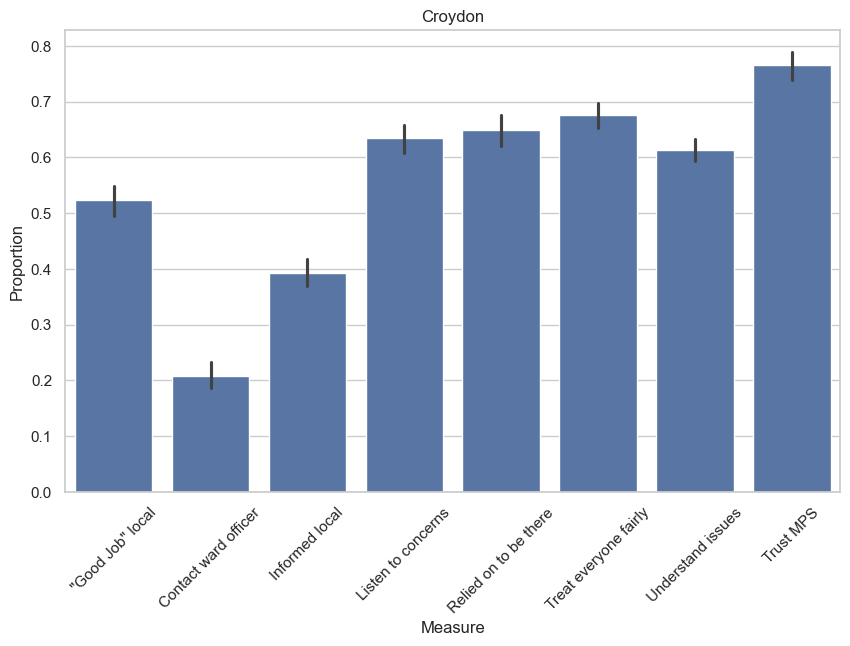

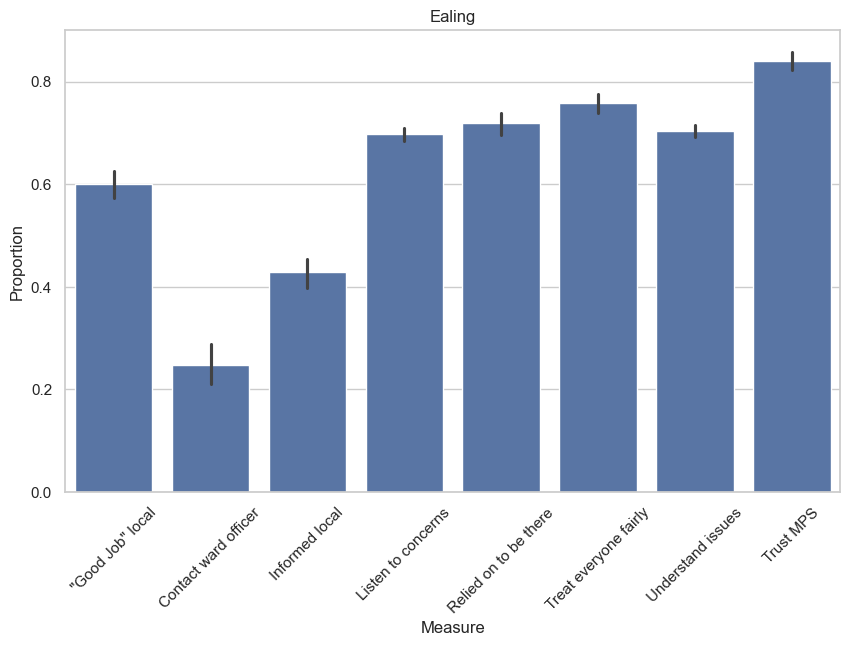

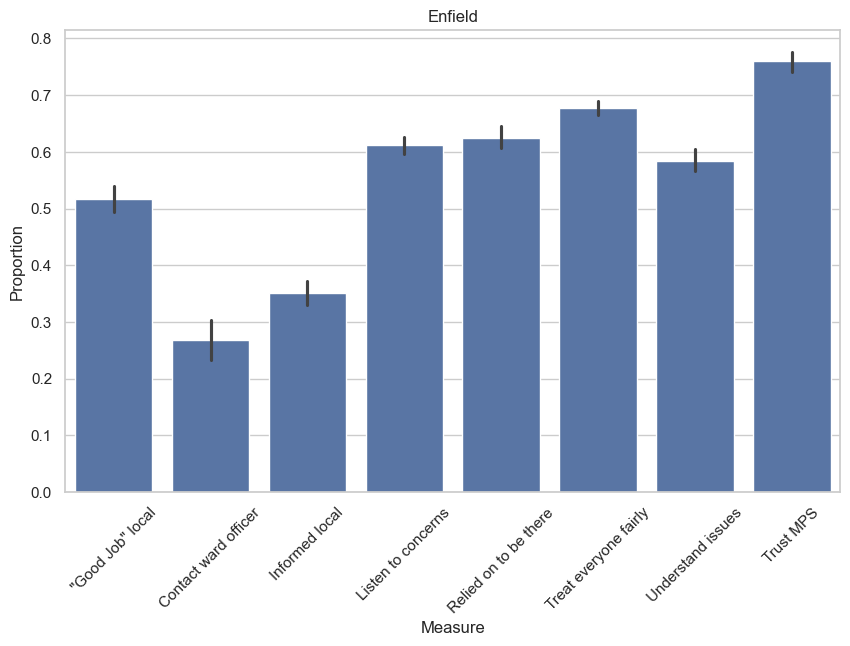

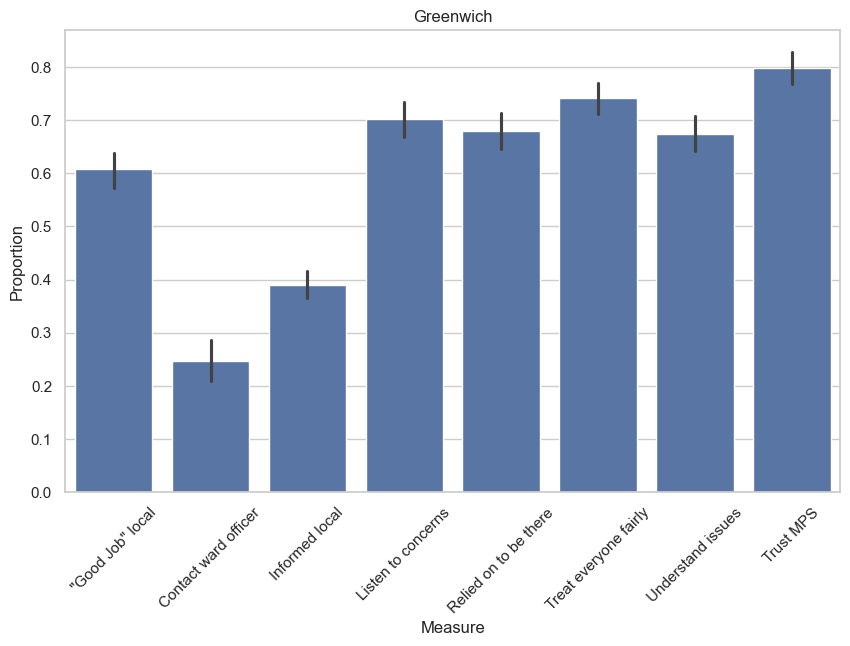

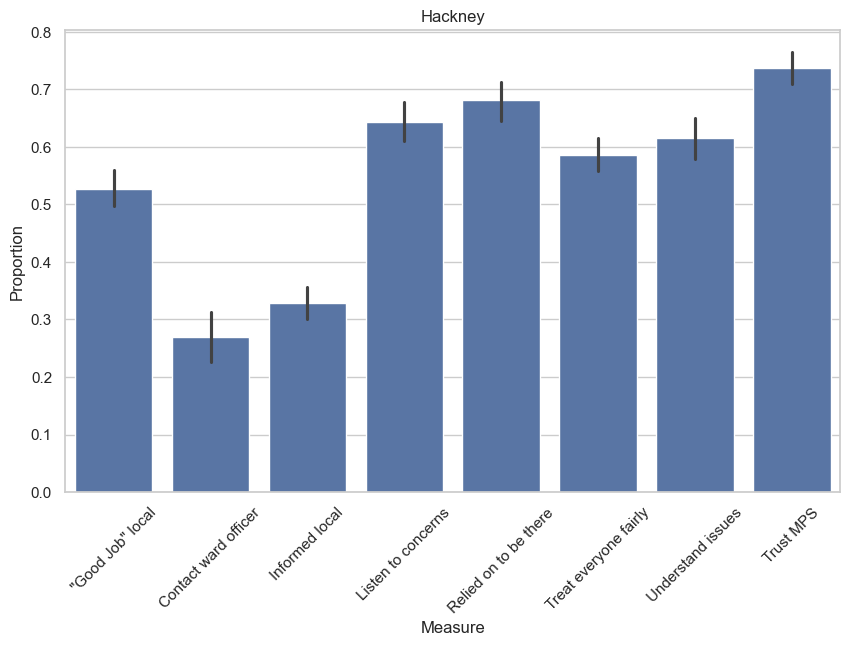

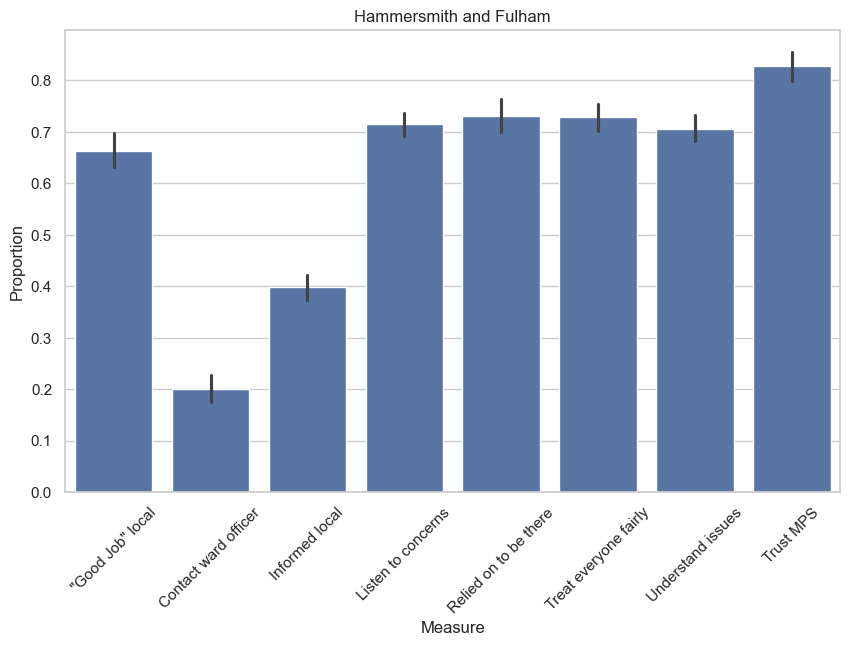

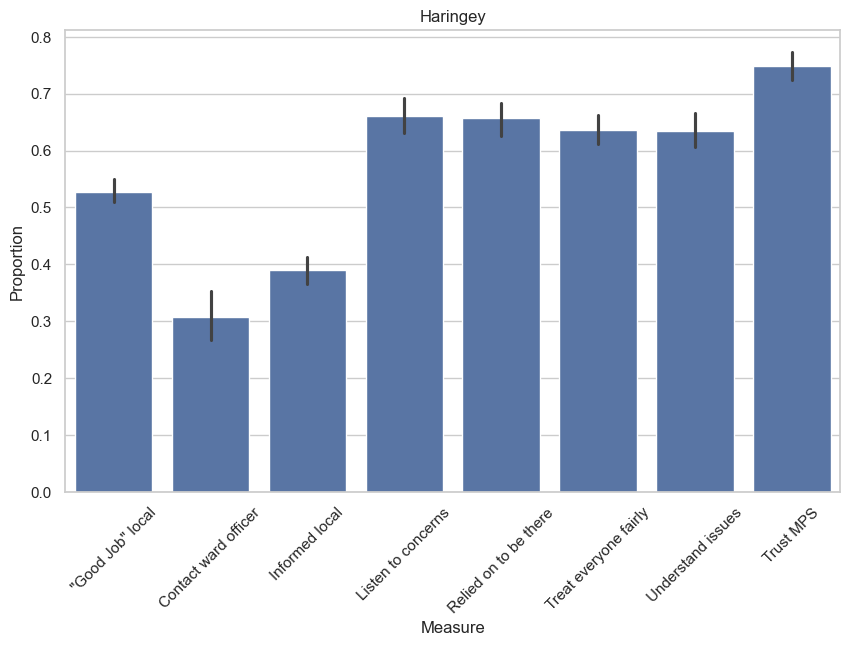

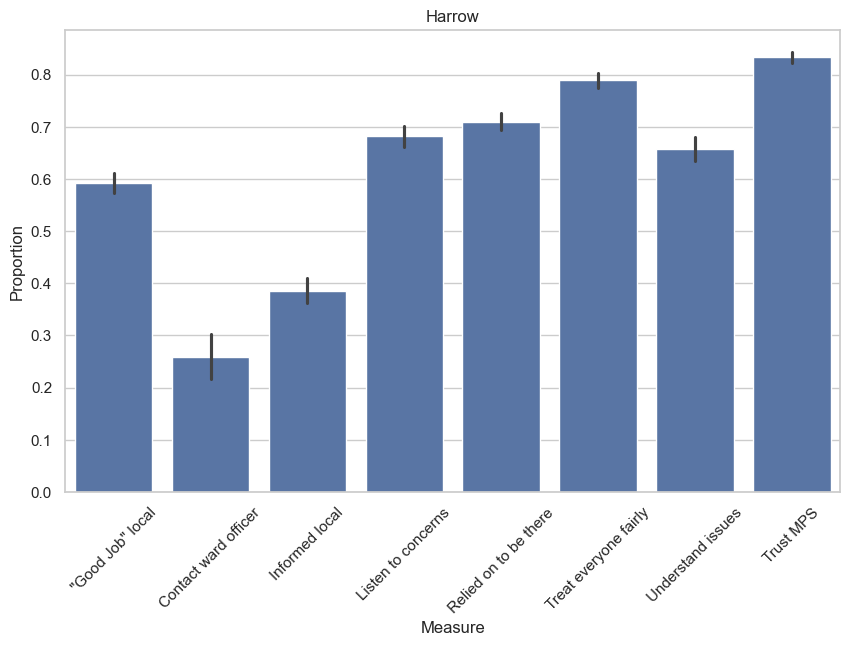

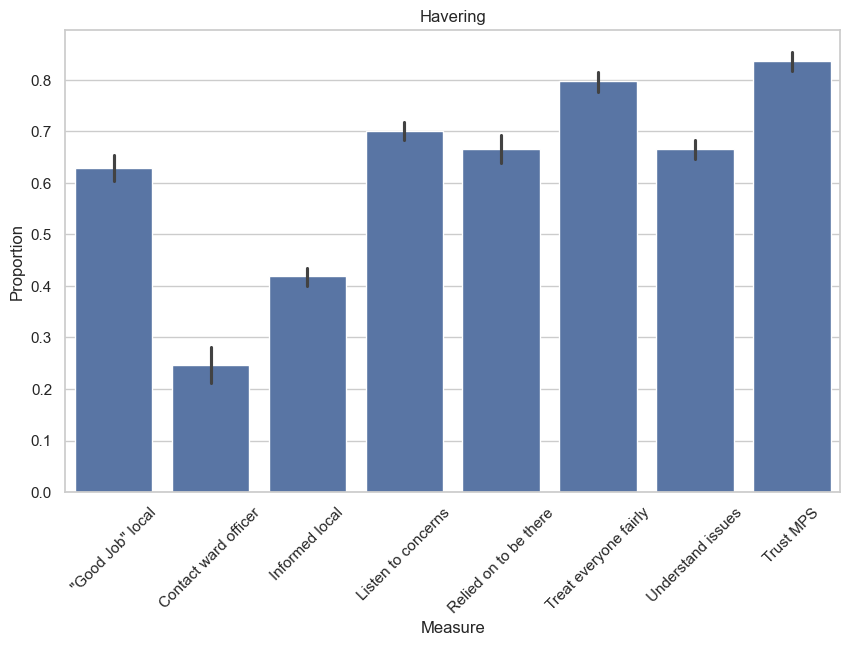

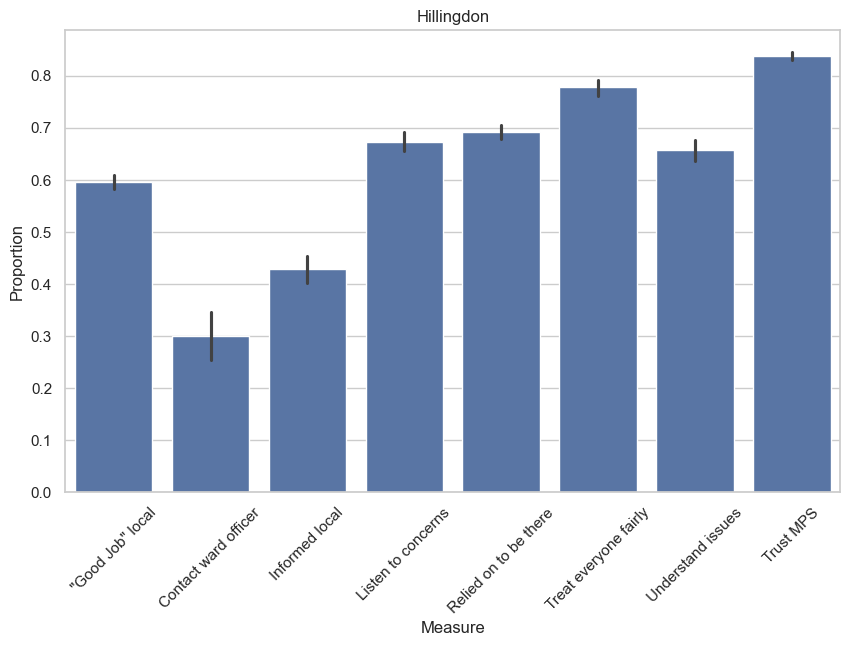

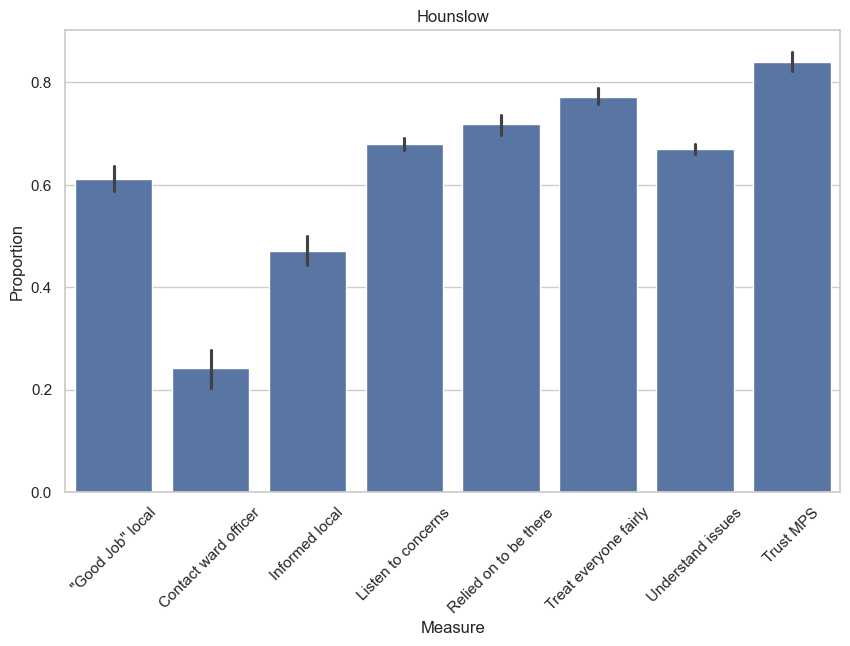

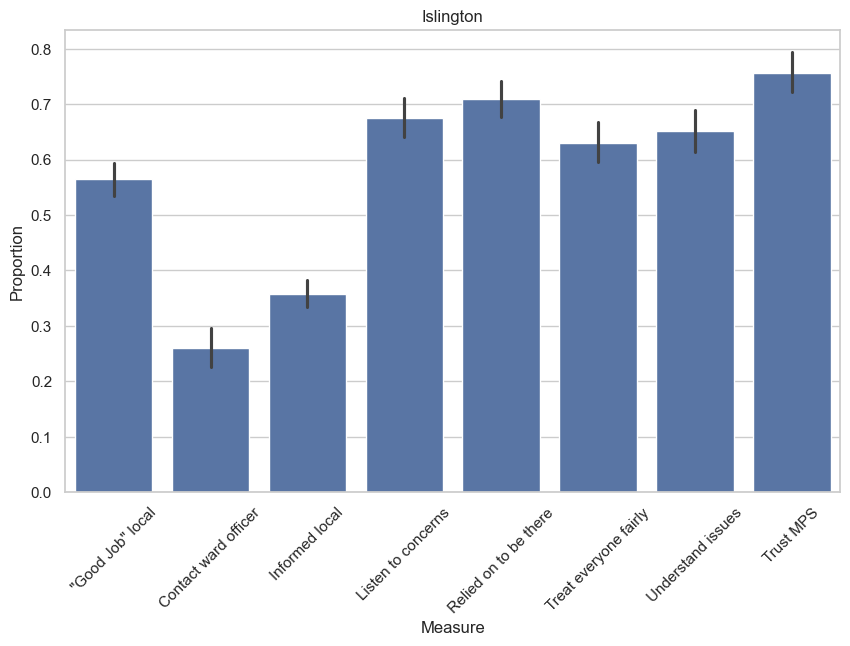

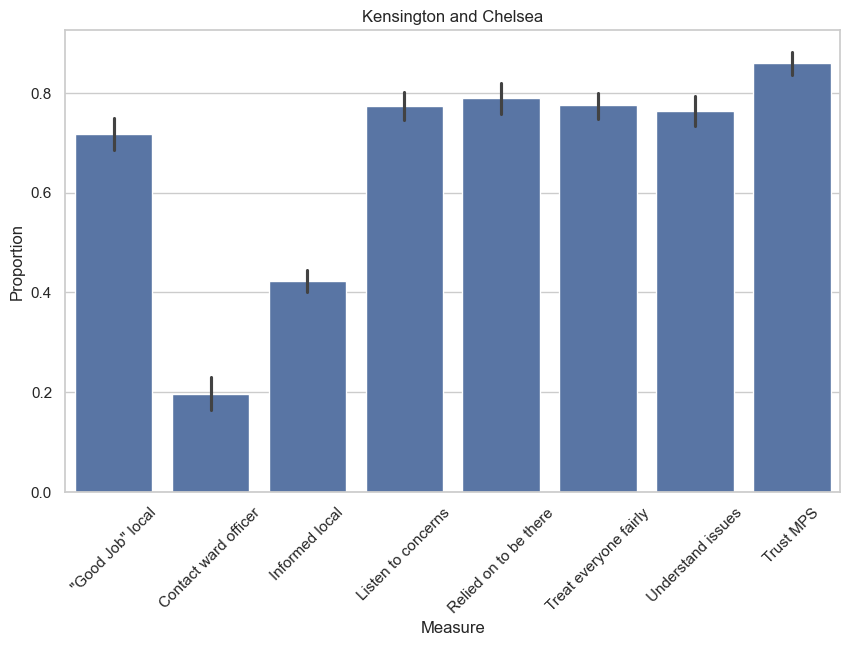

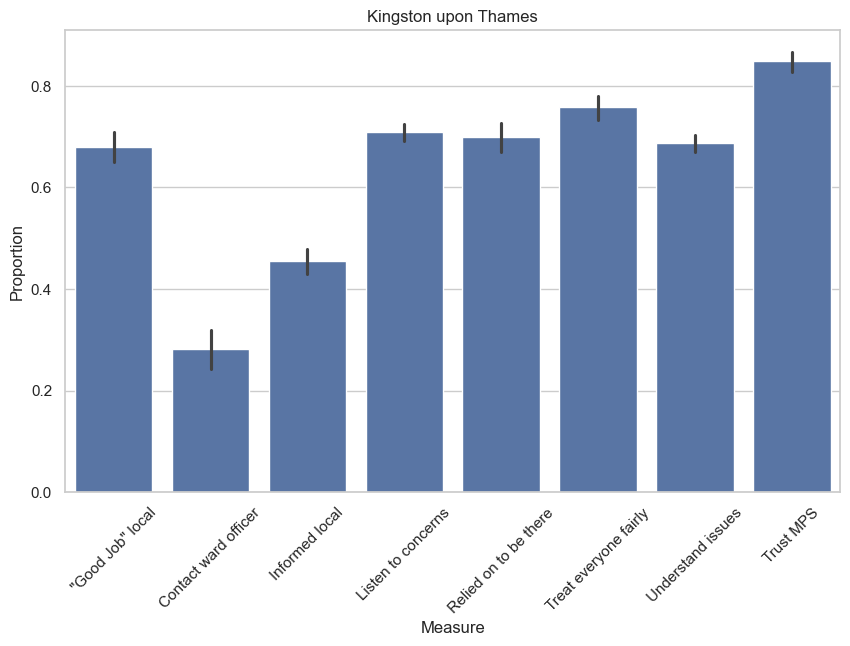

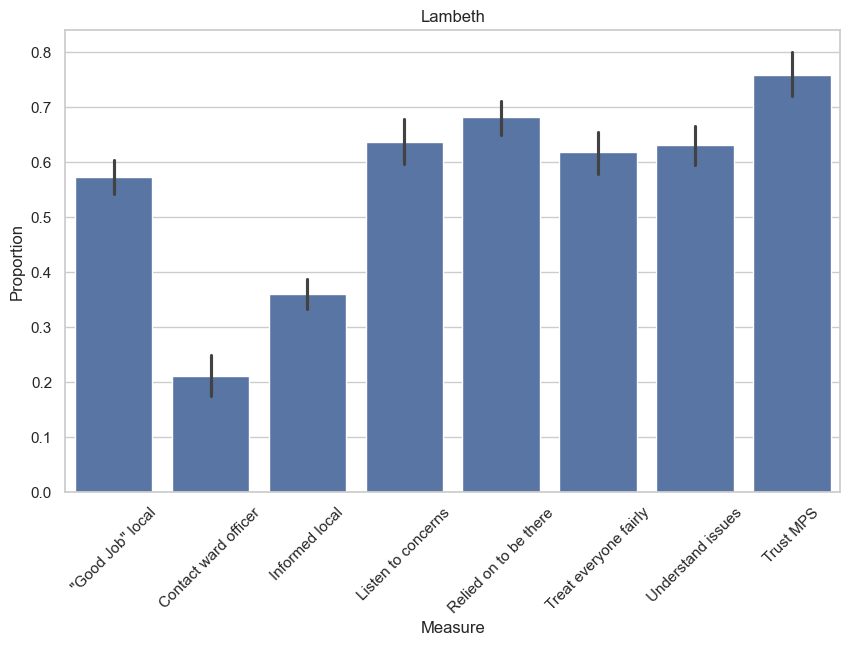

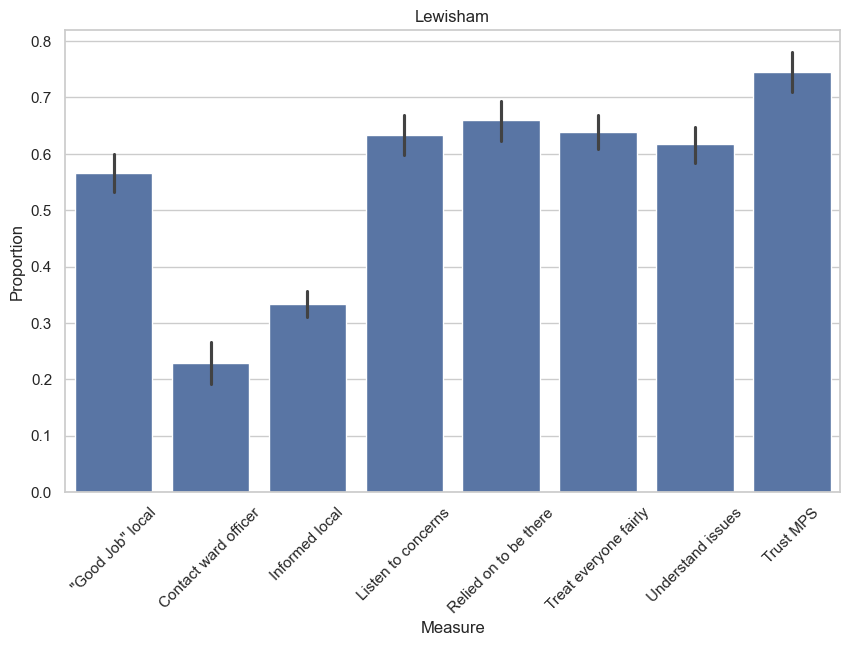

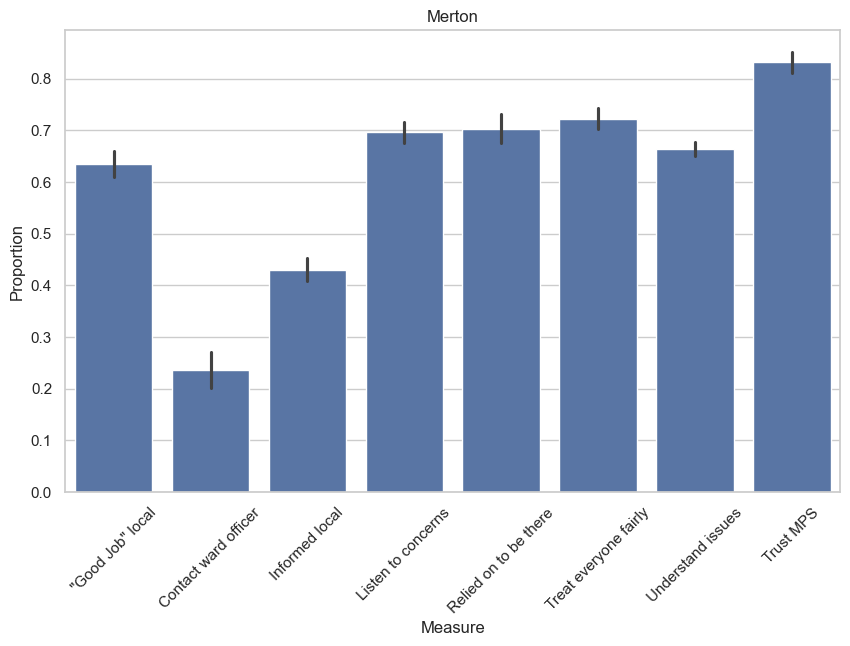

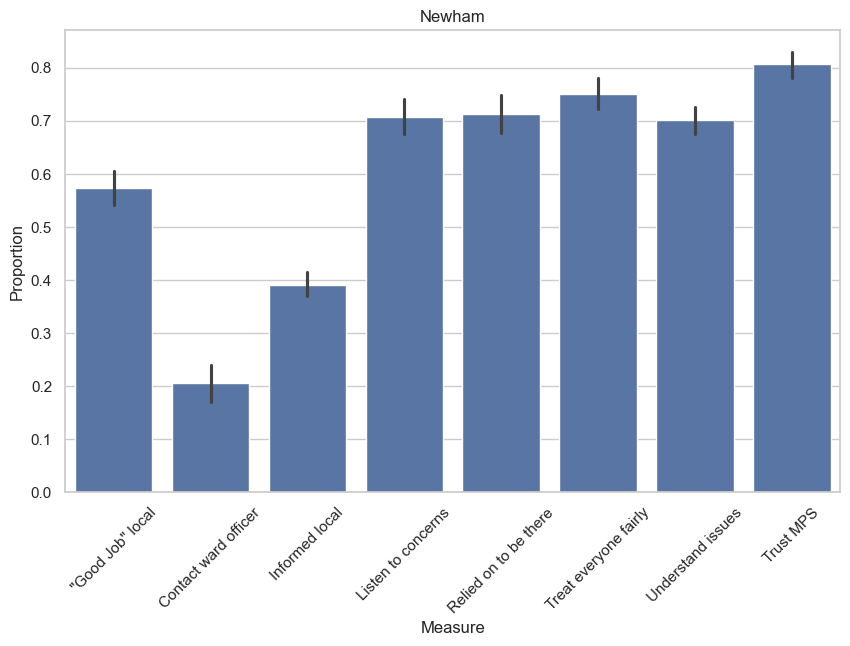

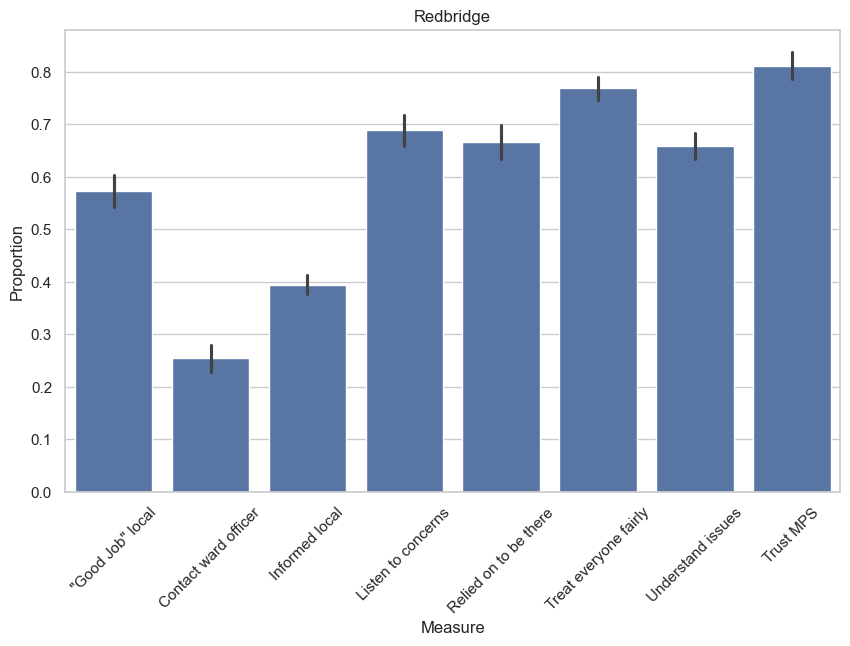

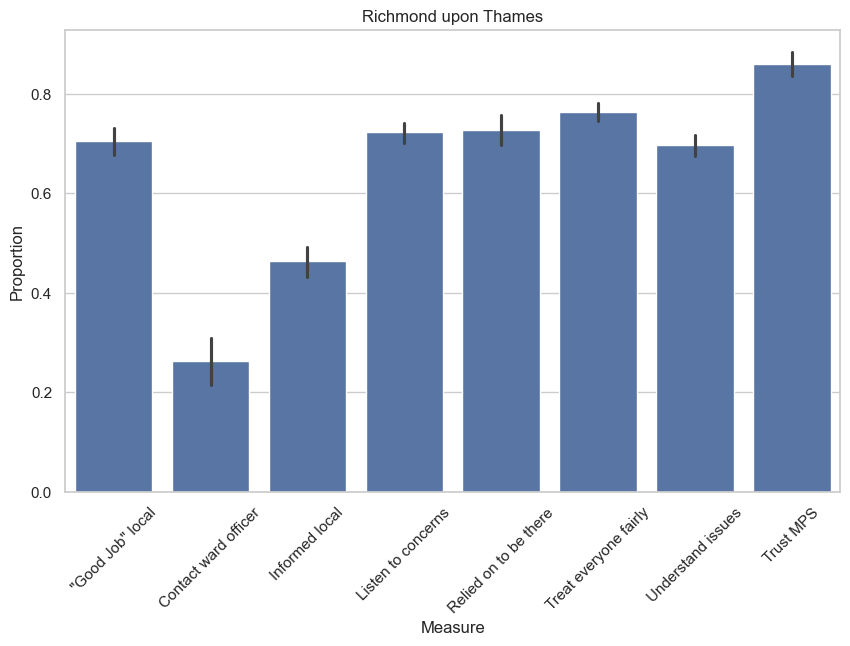

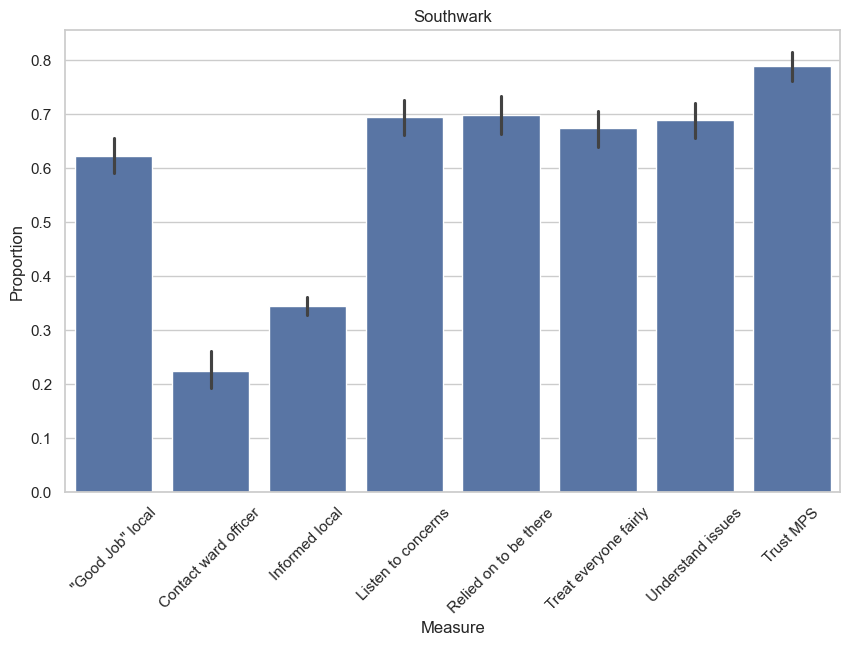

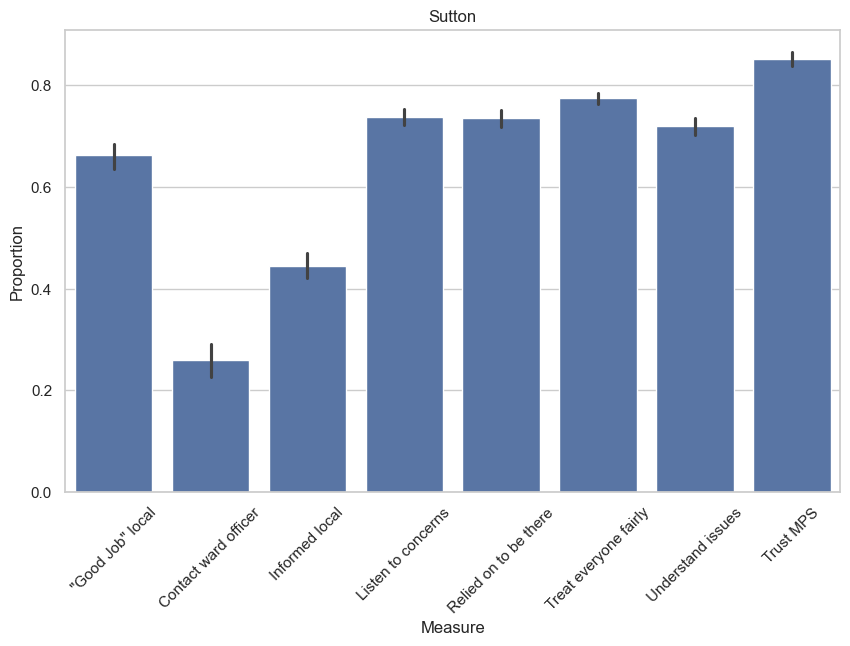

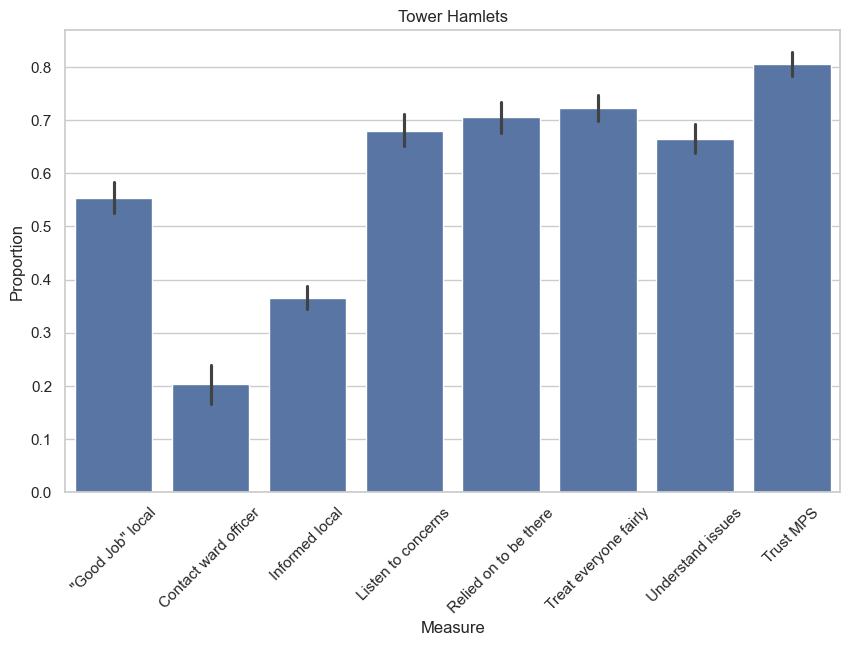

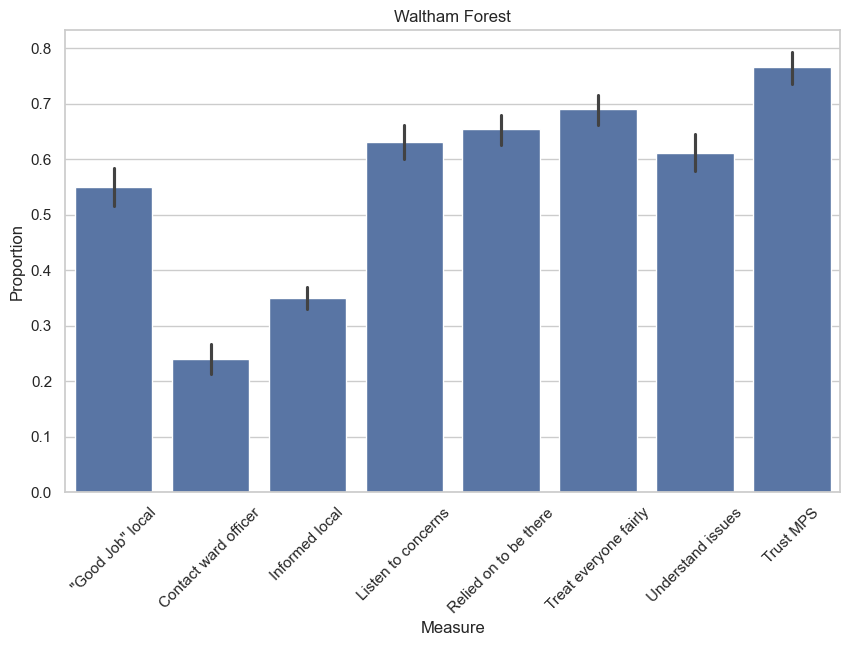

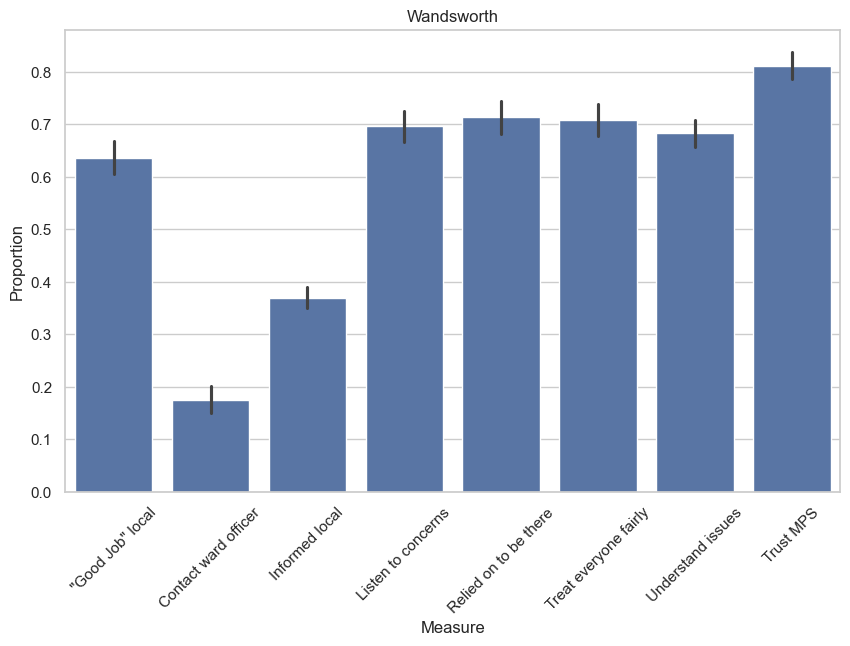

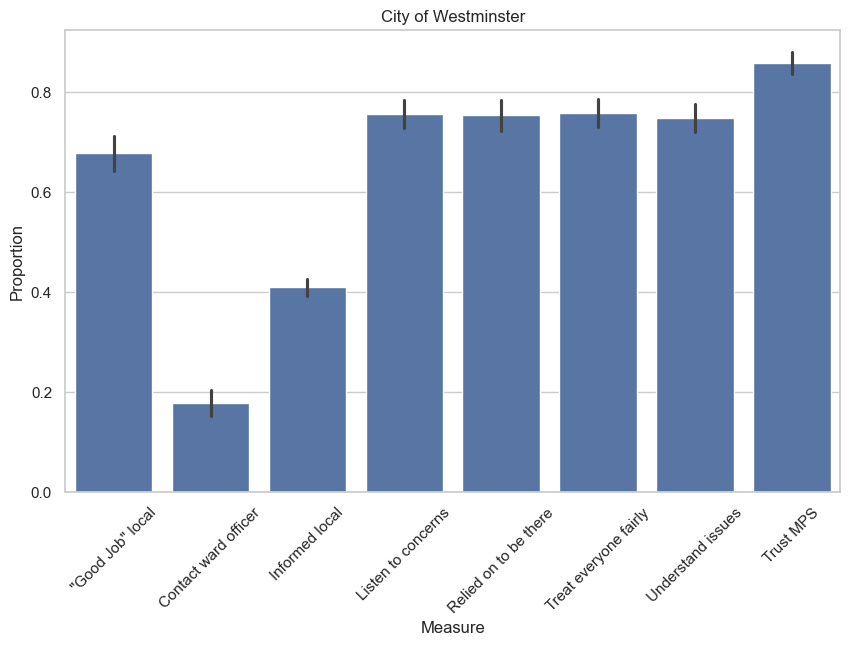

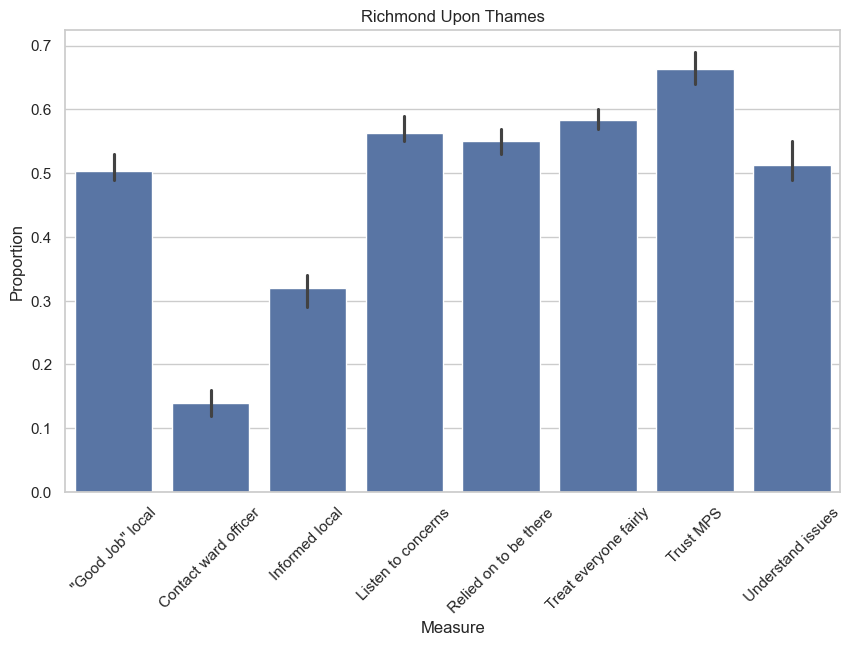

In [27]:
for borough in borough_dfs:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=borough_dfs[borough], x='Measure', y='Proportion')
    plt.title(borough)
    plt.xlabel('Measure')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.show()

# Comparing the measures throughout the boroughs

In [28]:
measures = df_Borough['Measure'].unique()
measures = list(measures)

In [29]:
measures_dfs = {}  # Dictionary to hold each borough's DataFrame

for measure in measures:
    measures_dfs[measure] = df_Borough[df_Borough['Measure'] == measure]

# Now 'borough_dfs' contains a DataFrame for each borough, accessible by borough name


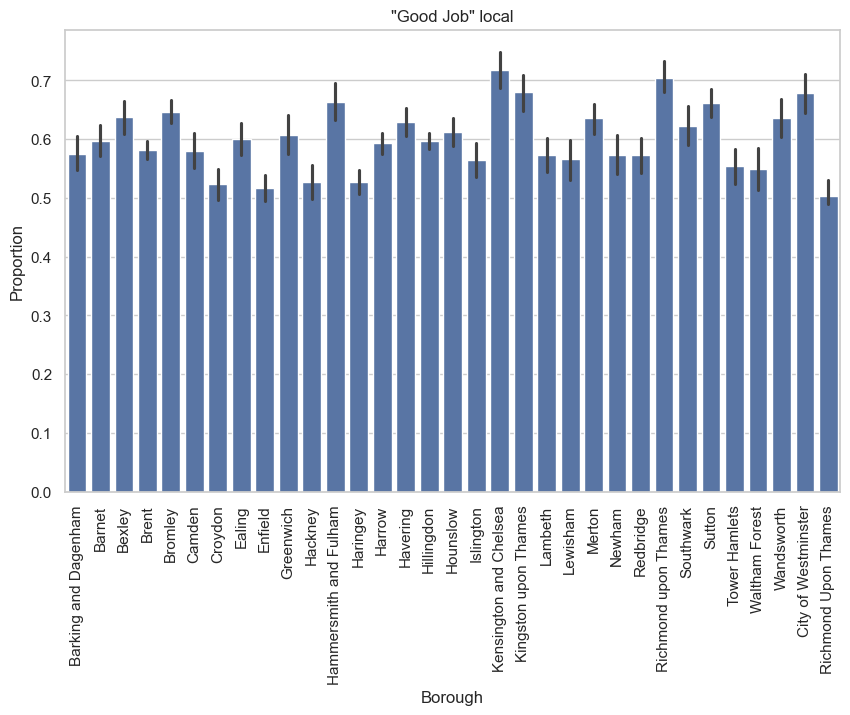

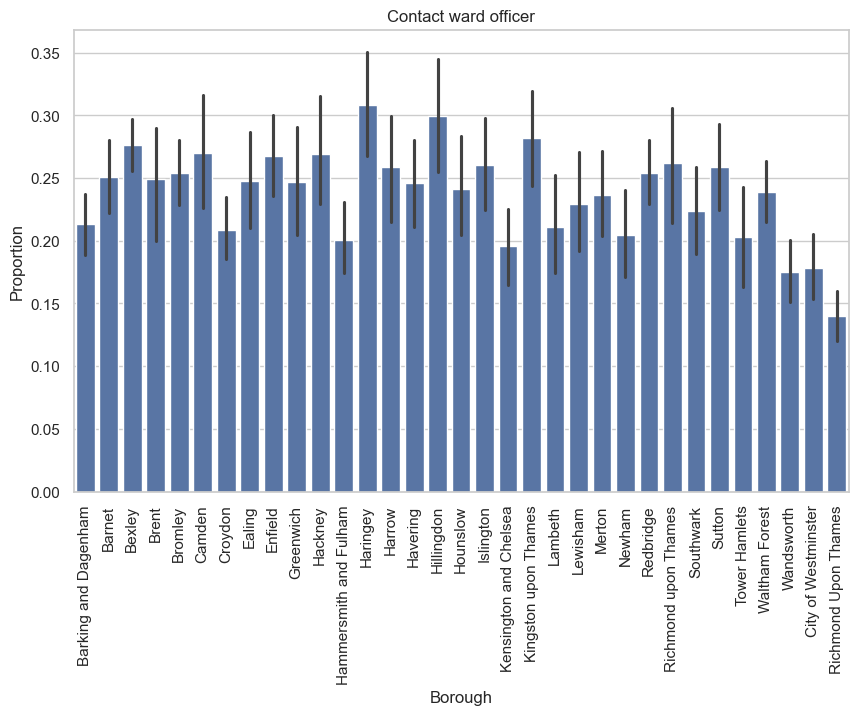

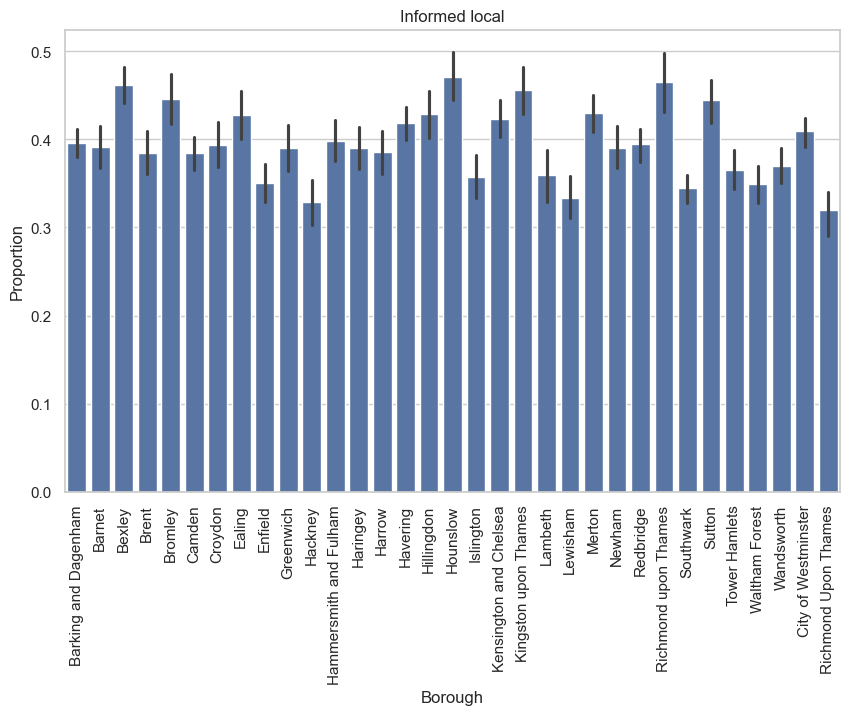

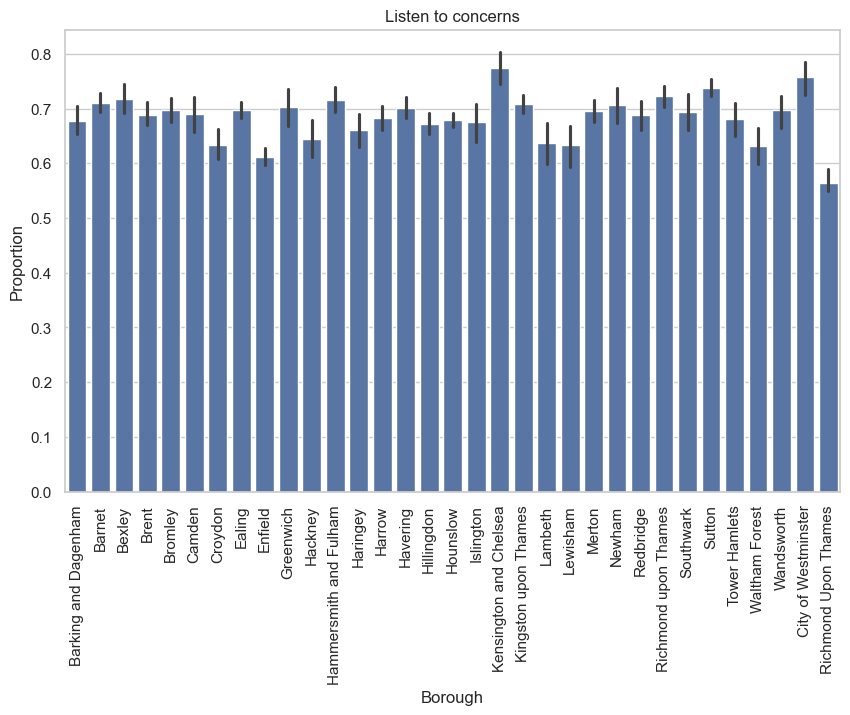

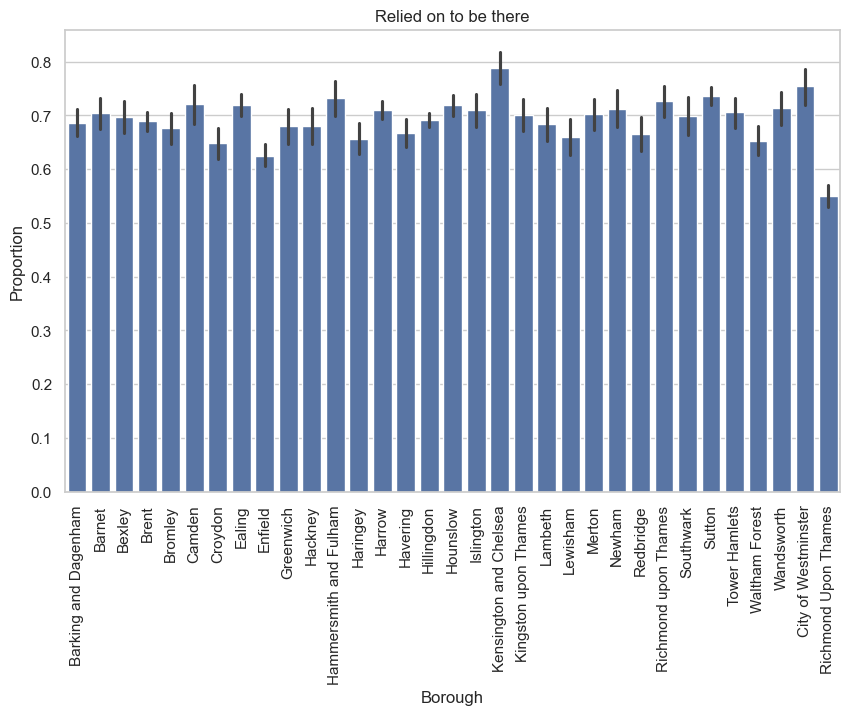

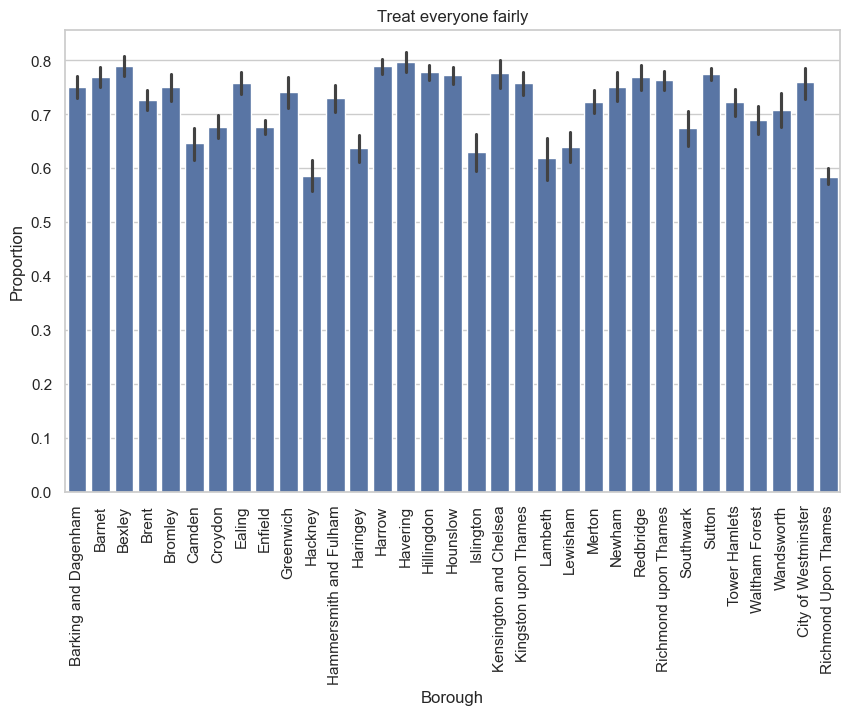

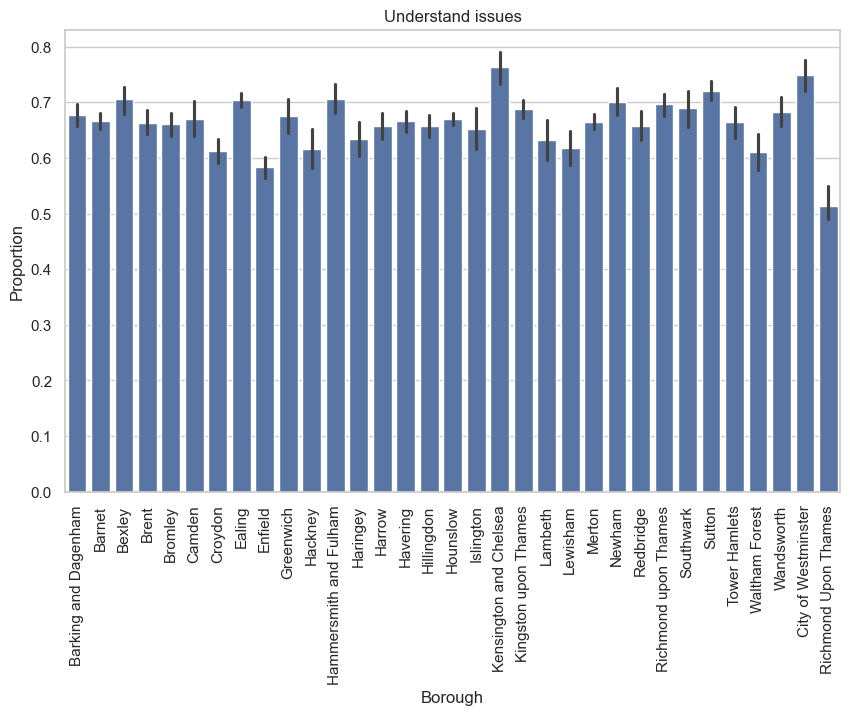

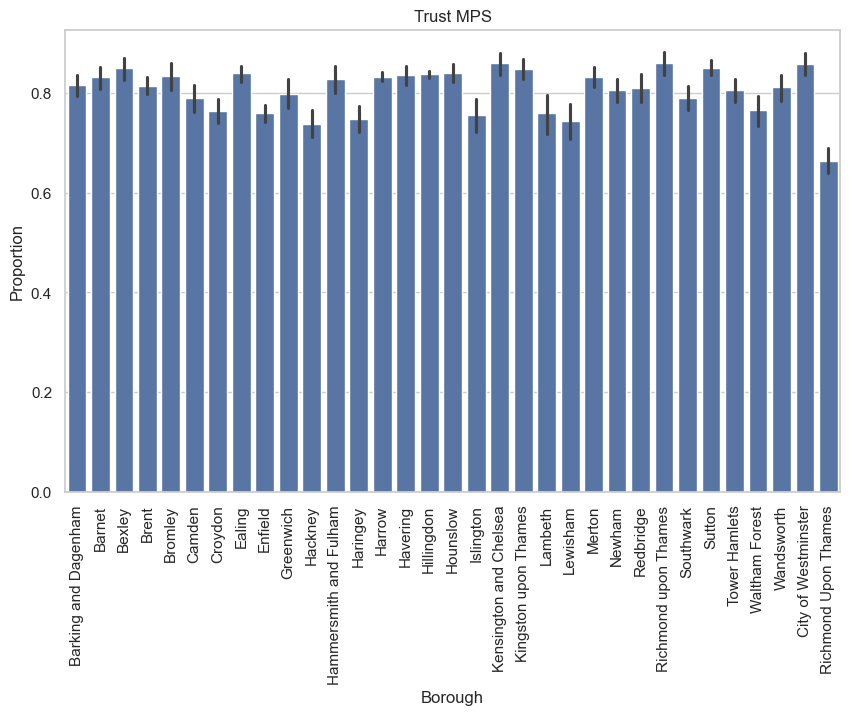

In [30]:
for measure in measures_dfs:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=measures_dfs[measure], x='Borough', y='Proportion')
    plt.title(measure)
    plt.xlabel('Borough')
    plt.ylabel('Proportion')
    plt.xticks(rotation=90)
    plt.show()

In [31]:
# for measure in measures_dfs:
#     plt.figure(figsize=(10, 6))
#     sns.barplot(data=measures_dfs[measure], x='Borough', y='Proportion', color='blue', label='Borough Proportion')
    
#     # Get the average proportion for the current measure
#     avg_proportion = average_proportions_df[average_proportions_df['Measure'] == measure]['Average_Proportion'].values[0]
    
#     # Plot the average proportion as a line across the plot
#     plt.axhline(y=avg_proportion, color='red', linestyle='--', label='Average Proportion')
    
#     plt.title(measure)
#     plt.xlabel('Borough')
#     plt.ylabel('Proportion')
#     plt.xticks(rotation=90)
#     plt.legend()  # Show the legend to explain the plot elements
#     plt.show()